In [ ]:
# l-bfgs-b algorithm local optimization of a convex function
from scipy.optimize import minimize
from scipy.optimize import rosen, rosen_der
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import time
np.random.seed(122)

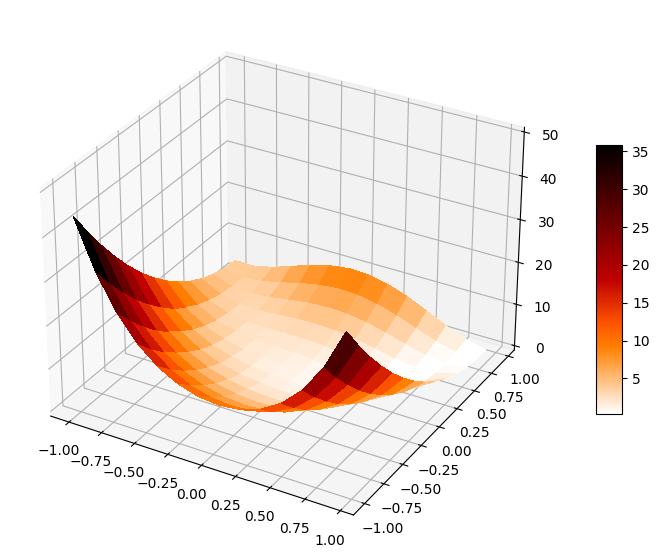

In [2]:
def plot_objective(objective):
    # Initialize figure 
    figRos = plt.figure(figsize=(12, 7))
    axRos = plt.subplot(111, projection='3d')

    # Evaluate function
    X = np.arange(-1, 1, 0.15)
    Y = np.arange(-1, 1, 0.15)
    X, Y = np.meshgrid(X, Y)
    XX = (X,Y)
    Z = objective(XX)

    # Plot the surface
    surf = axRos.plot_surface(X, Y, Z, cmap=cm.gist_heat_r,
                        linewidth=0, antialiased=False)
    axRos.set_zlim(0, 50)
    figRos.colorbar(surf, shrink=0.5, aspect=10)
    plt.savefig('objective_function.png',bbox_inches='tight', dpi=200)
    plt.show()

## Rosenbrock function
# objective function
b = 10
def objective(x):
    f = (x[0]-1)**2 + b*(x[1]-x[0]**2)**2
    return f

plot_objective(objective)

In [3]:
# derivative of the objective function
def derivative(x):
    df = np.array([2*(x[0]-1) - 4*b*(x[1] - x[0]**2)*x[0], \
                         2*b*(x[1]-x[0]**2)])
    return df

starttime = time.perf_counter()
# define range for input
r_min, r_max = -1.0, 1.0

# define the starting point as a random sample from the domain
pt = r_min + np.random.rand(2) * (r_max - r_min)
print('initial input pt: ', pt)

# perform the l-bfgs-b algorithm search
result = minimize(objective, pt, method='L-BFGS-B', jac=derivative)
print(f"Total time taken for the minimization:{time.perf_counter()-starttime:.4f}s")
# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])

# evaluate solution
solution = result['x']
evaluation = objective(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation)) 

initial input pt:  [-0.47704347 -0.09657418]
Total time taken for the minimization:0.0034s
Status : CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
Total Evaluations: 16
Solution: f([1.00000001 1.00000001]) = 0.00000
